<a href="https://colab.research.google.com/github/AnshumaanSingh1999/EcommerceBusinessStrategy/blob/main/Ecommercestrategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
!pip install -U -q PyDrive 
  
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials 
  
  
# Authenticate and create the PyDrive client. 
auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

In [6]:

link = 'https://drive.google.com/file/d/1g-j0p3qvFLATna7rIexb2M1QnbCCy-of/view?usp=sharing'
  
  
# to get the id part of the file 
id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('Ecommerce Customers.csv')   
  
df = pd.read_csv('Ecommerce Customers.csv') 
print(df)

                             Email  ... Yearly Amount Spent
0        mstephenson@fernandez.com  ...          587.951054
1                hduke@hotmail.com  ...          392.204933
2                 pallen@yahoo.com  ...          487.547505
3          riverarebecca@gmail.com  ...          581.852344
4    mstephens@davidson-herman.com  ...          599.406092
..                             ...  ...                 ...
495   lewisjessica@craig-evans.com  ...          573.847438
496            katrina56@gmail.com  ...          529.049004
497             dale88@hotmail.com  ...          551.620145
498            cwilson@hotmail.com  ...          456.469510
499      hannahwilson@davidson.com  ...          497.778642

[500 rows x 8 columns]


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [8]:
df.head()


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [9]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


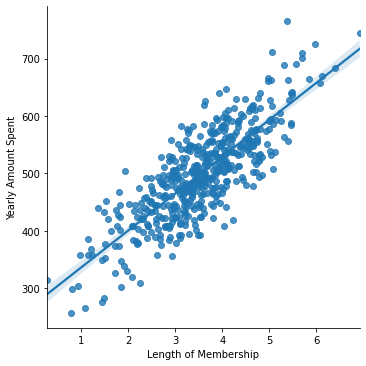

In [10]:
sns.lmplot(x="Length of Membership", y="Yearly Amount Spent", data=df);


In [12]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [14]:
X=df[[ 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [15]:
y=df['Yearly Amount Spent']

In [18]:
import sklearn as sk 


In [20]:
from sklearn.model_selection import train_test_split


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [24]:
from sklearn.linear_model import LinearRegression

In [26]:
lm=LinearRegression()

In [27]:
lm.fit(X_train, y_train, sample_weight=None)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [31]:
predictions=lm.predict(X_test)

Text(0, 0.5, 'Predicted Values')

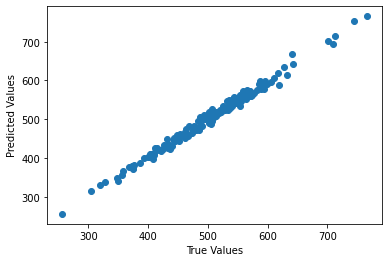

In [38]:
plt.scatter(y_test,predictions)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

In [36]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

In [37]:
cdf

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097
